In [1]:
import load_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
from pathlib import Path
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import mode
import seaborn as sns

In [3]:
_root_folder = "/tf/workspace/FMA/"
_feature_csv_path = Path(f"{_root_folder}fma_metadata/features_single_header.csv")
_genre_csv_path = Path(f"{_root_folder}fma_metadata/genres.csv")
_distance_matrix_filename=Path(f"{_root_folder}distances/distance_matrix.npy")
_meta_filename = Path(f"{_root_folder}fma_metadata/tracks_small.csv")

_model_filename = f"./saved_models/1cycle01-best.h5"

In [4]:
scaling="standard"

In [5]:
def get_voting_predictions(
    model, X, y, 
    samples_per_song
):
    probabilites = model.predict(X, verbose=0)

    y_true = np.argmax(y, axis=1)
    y_pred = probabilites.argmax(axis=1)

    predictions_per_song = y_pred.reshape((-1, samples_per_song))

    y_true_song = y_true[::samples_per_song]
    y_pred_song = np.zeros_like(y_true_song, dtype=int)

    for i, _ in enumerate(y_pred_song):
        y_pred_song[i] = mode(predictions_per_song[i])[0][0]

    return y_true_song, y_pred_song

In [6]:
def get_overall_predictions(
    model, X, y
):
    probabilites = model.predict(X, verbose=0)

    y_true = np.argmax(y, axis=1)
    y_pred = probabilites.argmax(axis=1)

    return y_true, y_pred

In [7]:
examples_per_song = 39

In [8]:
(
    X_train, X_eval, y_train, y_eval, sample_weights
) = load_data.get_densenet_samples(scale=scaling, remove_nan=False, data="big", calc_scores=True)

Loading data from tensor stored at: /tf/workspace/FMA/tensors/all_data_tensor_power_db_0-5_stride.npy


/tf/workspace/matthew.almeida001/NBScoringDensenet/score_calculation/border_scores.py:81: RuntimeWarning: divide by zero encountered in true_divide
  np.min(np.abs(distances_to_neighborhood_points), axis=1)[:, np.newaxis]
/tf/workspace/matthew.almeida001/NBScoringDensenet/score_calculation/border_scores.py:81: RuntimeWarning: invalid value encountered in true_divide
  np.min(np.abs(distances_to_neighborhood_points), axis=1)[:, np.newaxis]
/tf/workspace/matthew.almeida001/NBScoringDensenet/score_calculation/border_scores.py:104: RuntimeWarning: divide by zero encountered in log2
  log_prob_class_c = np.where(prob_class_c > 0, np.log2(prob_class_c), 0)
/tf/workspace/matthew.almeida001/NBScoringDensenet/score_calculation/border_scores.py:120: RuntimeWarning: invalid value encountered in true_divide
  count_of_neighbors_of_class_c
/tf/workspace/matthew.almeida001/NBScoringDensenet/score_calculation/border_scores.py:125: RuntimeWarning: divide by zero encountered in true_divide
  avg_inv = 

In [9]:
np.sum(sample_weights)

249599.99999999997

In [10]:
len(X_train)

249600

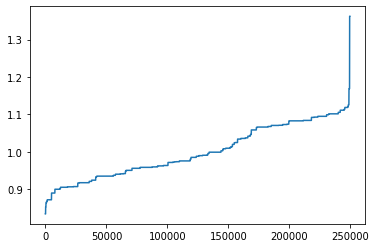

In [11]:
plt.plot(np.sort(sample_weights))

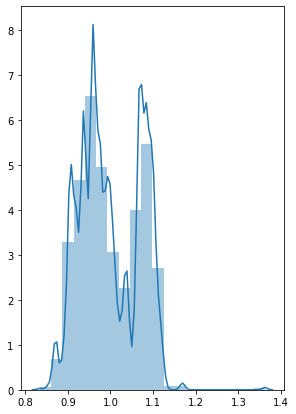

In [28]:
# inches width 1.1811
# inches height 1.76378

plt.figure(figsize=(1.1811*4,1.76378*4))
sns.distplot(sample_weights, bins=20)